# Data Mining Challenge 2020

## Team
* Tommaso Fioravanti - 105xxxxx(Student-ID)
* Matteo Moreschini - 105xxxxx(Student-ID)
* Alessio Introito Russo - 105xxxxx(Student-ID)
* Davide Salaorni - 10526800


# 1. Introduction
Questo progetto serve a...

# 2. Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

train = pd.read_csv("../dataset/original/train.csv")
test = pd.read_csv("../dataset/original/x_test.csv")

In [4]:
def convert_date(df):
    df['Unnamed: 0'] = df['Unnamed: 0'].str.split(" ")
    df['Unnamed: 0'] = df['Unnamed: 0'].apply(lambda x: "-".join(x[1:]))
    df = df.rename(columns={'Unnamed: 0':'Date'})
    df.Date = pd.to_datetime(df.Date)
    return df

In [5]:
df = pd.concat([train, test],sort=False)
df = convert_date(df)
df = df.sort_values(['sku','Date'])

train = df[~df.target.isna()]
test = df[df.target.isna()]

# 3. Baseline

# 4. <b>Cluster Analysis</b>

In this section we show


- Hierarchical Clustering for timeseries

- Correlation Heatmap for clustering


# Hierarchical Clustering

We load all the necessary libraries to perform hierarchical clustering.

In [6]:
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy import stats


Then we group the timeseries by sku and we compute the distance matrix for the hierarchical clustering using the <i>linkage</i> function. 

The distance measure used for the clustering is the <i>correlation</i> between each pairs of timeseries.


In [7]:
series1=[]
ix=[]
for i, s in enumerate(set(train.sku)):
    ix.append(s)
    series1.append(((train[train.sku==s].target).values))
series1=np.asarray(series1)
z1= linkage(series1,'single',metric='correlation')


Then we plot the resulting dendogram.

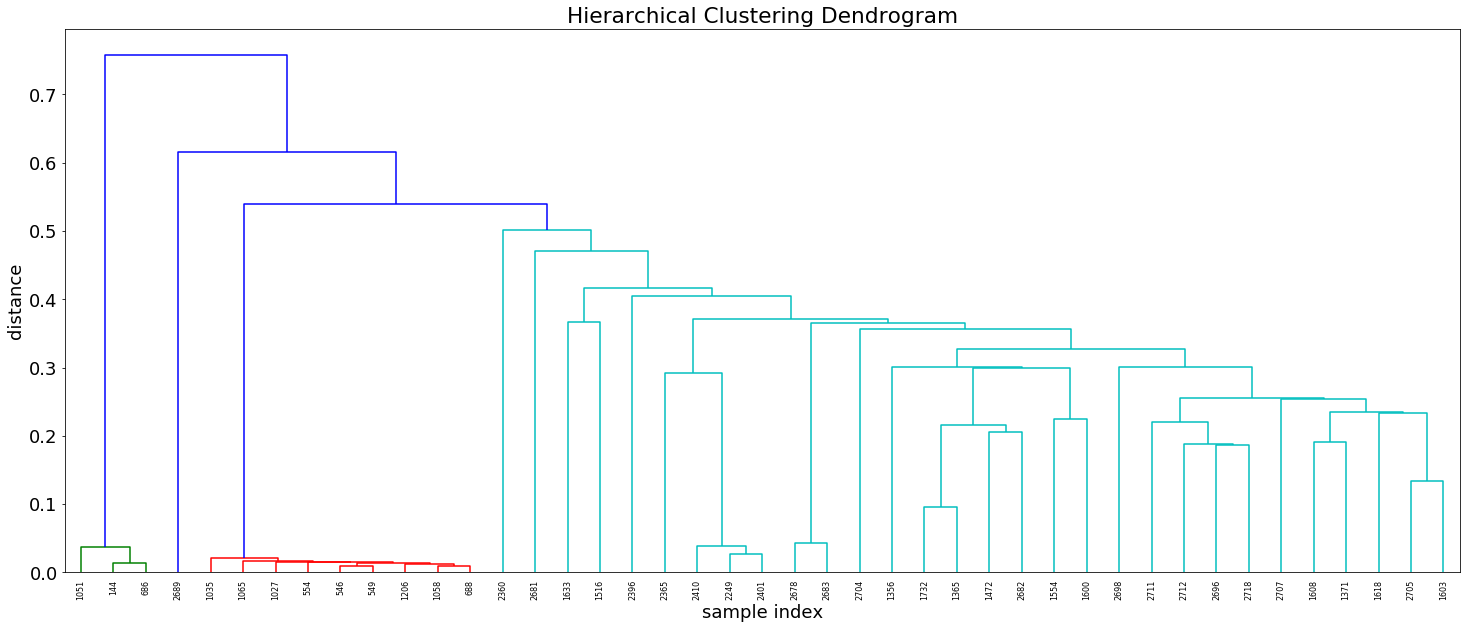

In [8]:
plt.figure(figsize=(25, 10))
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(z1, 
    leaf_rotation=90.,  
    leaf_font_size=8.,  
    labels=ix
)
plt.show()

Using the <i>Knee and Elbow</i> analysis (see <i> Clustering.ipynb</i> for the code) we have seen that a reasonable number of clusters is 4.


So we put our evidence on what happens with 4 clusters. 

Using the <i>fcluster</i> function we found the labels of the 4 clusters and we retrieve the corresponding sku, grouping the most correlated timeseries and creating a small dataframe.

In [10]:
label_corr=fcluster(z1,4,criterion='maxclust') #Cluster with "correlation distance measure"
sku=list((set(train.sku)))

data={'Label': label_corr,
     'Sku':sku}
df_cluster=pd.DataFrame(data, columns=['Label','Sku'])

#Timeseries of 1st cluster
cluster1=df_cluster[df_cluster.Label==1].Sku
cluster1=np.asarray(cluster1)
#2 cluster
cluster2=df_cluster[df_cluster.Label==2].Sku
cluster2=np.asarray(cluster2)
#3 cluster
cluster3=df_cluster[df_cluster.Label==3].Sku
cluster3=np.asarray(cluster3)
#4 cluster
cluster4=df_cluster[df_cluster.Label==4].Sku
cluster4=np.asarray(cluster4)

cluster=[cluster1,cluster2,cluster3,cluster4]



We plot the resulting clusters

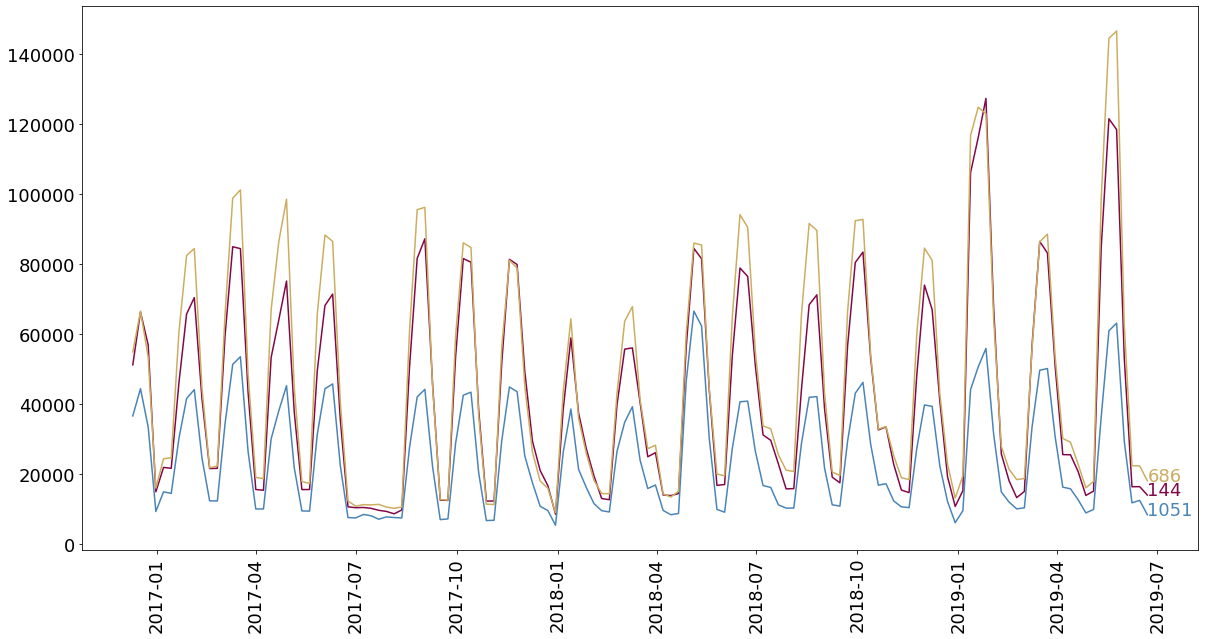

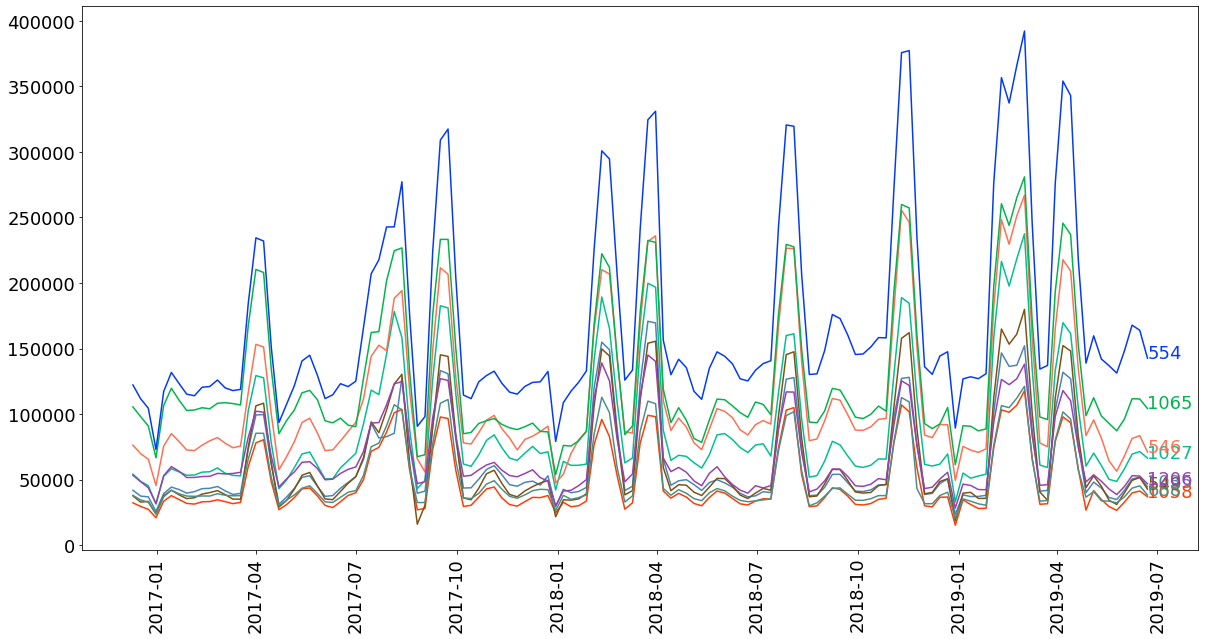

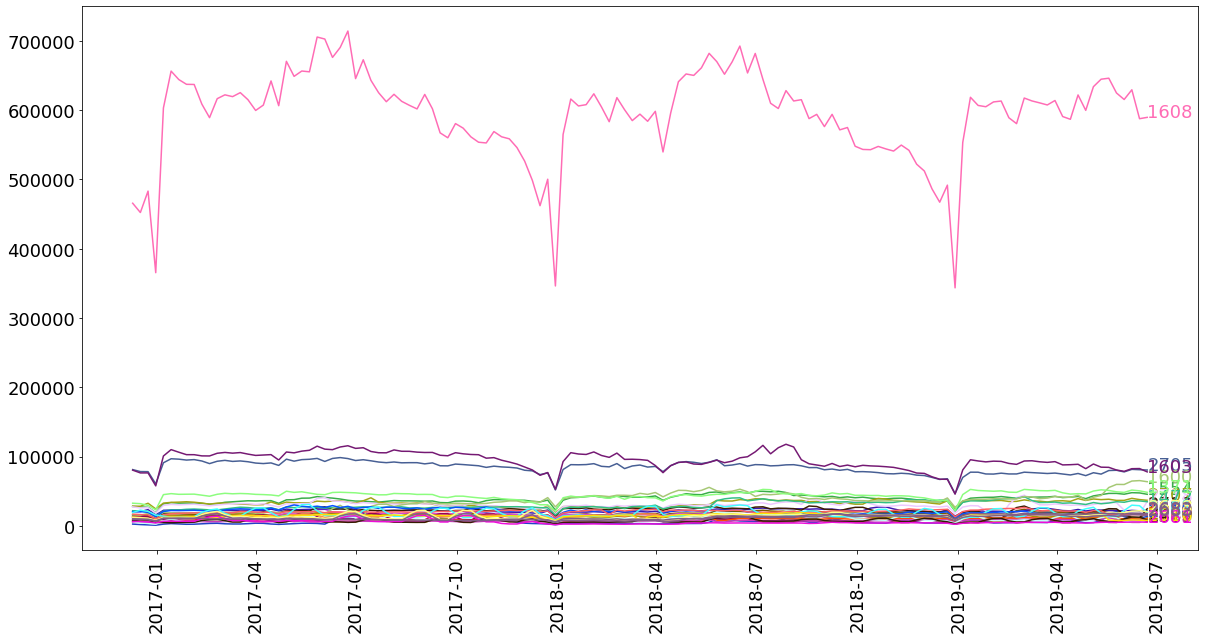

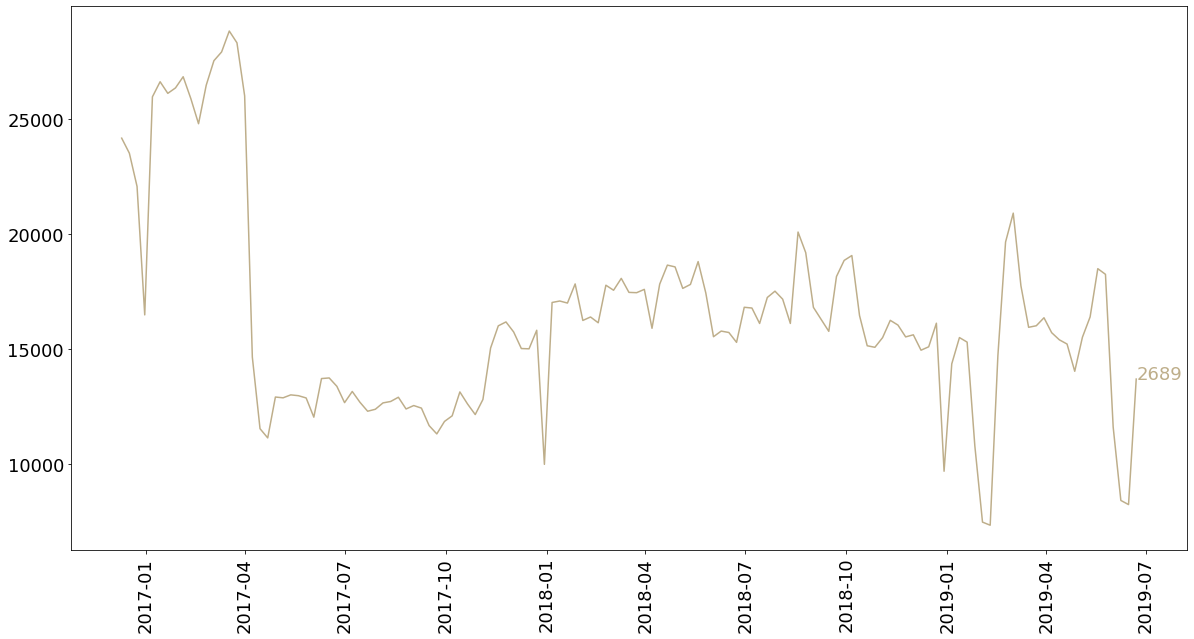

In [11]:
for j in cluster:
    
    mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(set(df.sku)), replace=False)
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=90)
    for i in range(len(j)):
        plt.plot(train[train.sku==j[i]].Date, train[train.sku==j[i]].target,  color=mycolors[i])
        last_x, last_y = train[train.sku==j[i]].Date.values[-1], train[train.sku==j[i]].target.values[-1]
        plt.text(last_x, last_y, str(j[i]), color=mycolors[i])


We can see that the last cluster is composed only by one timeseries, so it could be labeled as outlier.


# Correlation HeatMap

Next we plot the correlation heatmap for the first two clusters (they will be used for training the models) to show that the timeseries inside the clusters are highly correlated

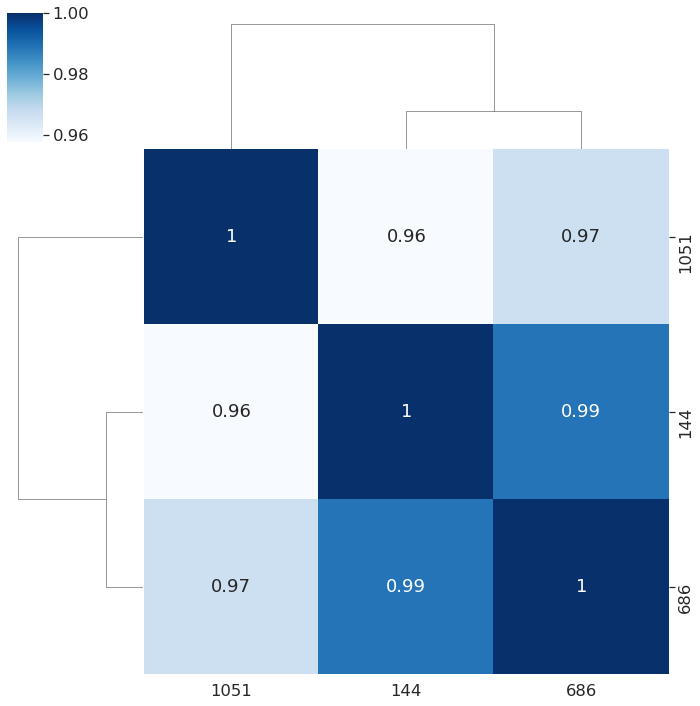

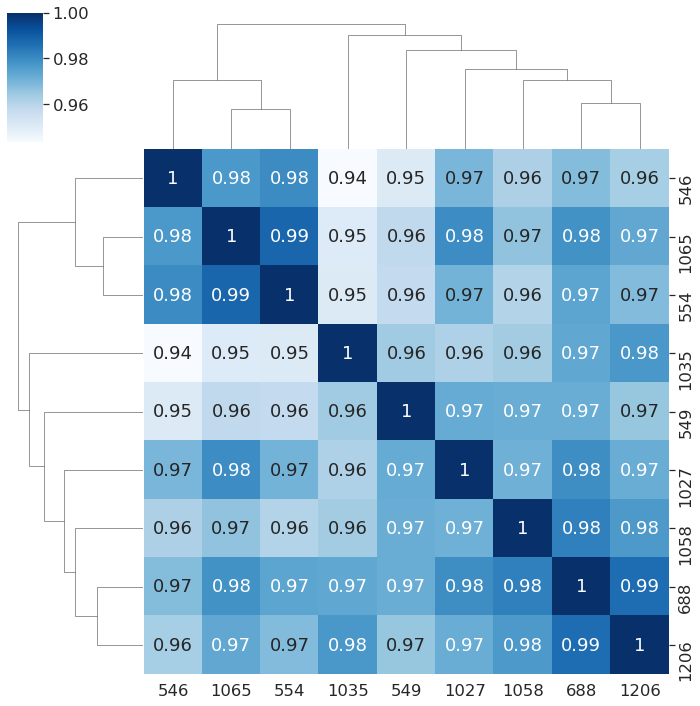

In [24]:

di={}

for i in cluster1:
    di.update({i:np.asarray((train[train.sku==i].target))})
df_clu1=pd.DataFrame(di).pct_change()

corr1=df_clu1.corr()
sns.set(font_scale=1.5)
sns.clustermap(corr1, cmap="Blues", annot=True);

di2={}
for i in cluster2:
    di2.update({i:np.asarray((train[train.sku==i].target))})
df_clu2=pd.DataFrame(di2).pct_change()

corr2=df_clu2.corr()
sns.set(font_scale=1.5)
sns.clustermap(corr2, cmap="Blues", annot=True);



# 5. Feature Engineering

# 6. Feature Selection

# 7. Model

# 8. Feature Importance

# 9. Model Comparison

# 10. Error Analysis

# 11. Future Steps (?)